In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv


In [3]:
def get_image(i):
    img = cv.imread('test_images2/generated_images/' + str(i) + '.png')

    R, G, B = cv.split(img)

    r_out = cv.equalizeHist(R)
    g_out = cv.equalizeHist(G)
    b_out = cv.equalizeHist(B)

    out = cv.merge((r_out, g_out, b_out))

    return out


In [4]:
img = cv.imread('test_images2/generated_images/' + str(6743) + '.png')

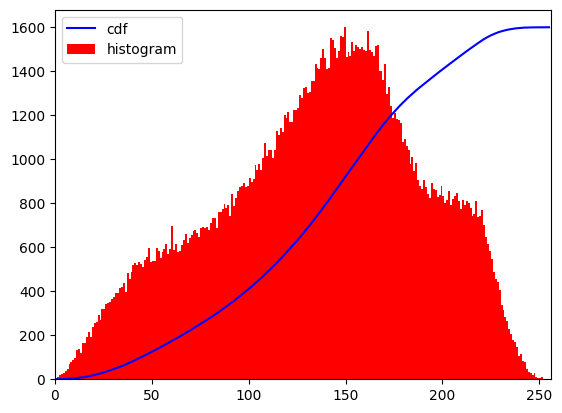

In [5]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

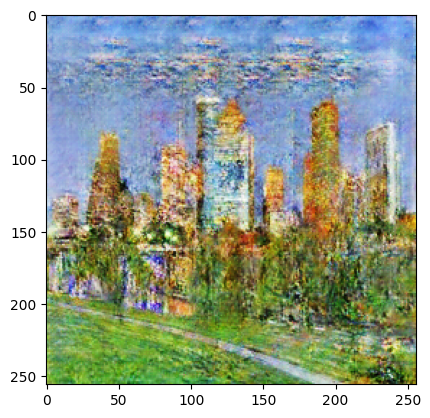

In [6]:
from matplotlib import pyplot as plt
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [7]:
R, G, B = cv.split(img)

r_out = cv.equalizeHist(R)
g_out = cv.equalizeHist(G)
b_out = cv.equalizeHist(B)

out = cv.merge((r_out, g_out, b_out))

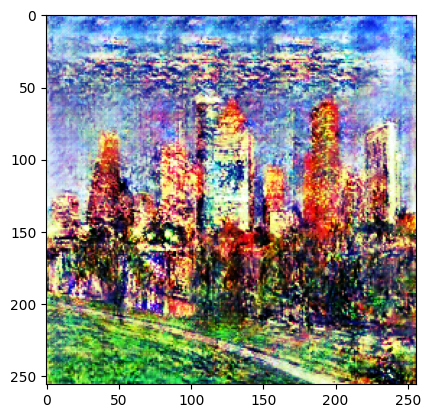

In [8]:
from matplotlib import pyplot as plt
RGB_img = cv.cvtColor(out, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

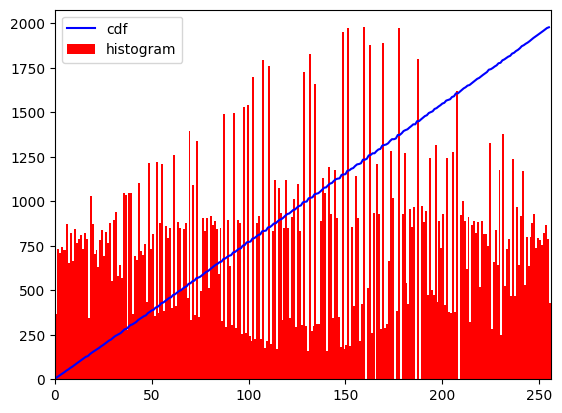

In [9]:
hist,bins = np.histogram(out.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(out.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [10]:
for i in range (1, 7039):
    new_im = get_image(i)
    cv.imwrite("histogram_generated/images/" + str(i) + ".png", new_im)

In [11]:
import tensorflow as tf

In [12]:
new_model = tf.keras.models.load_model('classification_model.h5')

2022-12-06 20:05:44.056117: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 20:05:44.056246: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [13]:
def get_predictions(file_path, model):
    img_array = tf.keras.utils.image_dataset_from_directory(
                file_path)
    predictions = model.predict(img_array)
    predicted_labels = []
    for prediction in predictions:
        predicted_labels.append(np.argmax(prediction))
    return predicted_labels
    
    

In [14]:
local_means = get_predictions("histogram_generated", new_model)

Found 7038 files belonging to 1 classes.


2022-12-06 20:06:01.080208: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-06 20:06:01.080260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [15]:
local_means.count(0) / (len(local_means))

0.38093208297811876